# Sorting Algorithms


This document contains my own implementation of the most popular sorting algorithms:

* shuffleSort     -  Time Complexity: O(n!)        
* selectionSort   -  Time Complexity: O(n^2)       
* bubbleSort      -  Time Complexity: O(n^2)       
* insertionSort   -  Time Complexity: O(n^2)       
* heapSort        -  Time Complexity: O(n * log n)   
* quickSort       -  Time Complexity: O(n * log n)   
* mergeSort       -  Time Complexity: O(n * log n)   
* countingSort    -  Time Complexity: O(n)         

In [1]:
import random
import numpy as np
from collections import Counter

In [2]:
lst = [9,1,2,3,8,7,6,4,5]

In [3]:
def is_sorted(array):
    ''' Iterate through the array. Ensure that the next element >= previous element '''
    for i in range(len(array)-1):
        if array[i+1] < array[i]:
            return False
    return True

In [4]:
def shuffleSort(array):
    ''' Check if array is sorted. Else, shuffle again until sorted '''
    if is_sorted(array):
        return array
    else:
        while not is_sorted(array):
            random.shuffle(array)
        return array

In [5]:
def selectionSort(array):
    ''' The array consists of two subarrays. Initially one is empty and the other contains all elements.
    Iterate through the array to find the smallest element. Send the smallest element to the end of the
    originally empty subarray. Repeat this process n-1 times until the subarray is sorted and full '''
    index, smallest, sub_array = 0, np.inf, 0
    for _ in range(len(array)):
        for i in range(sub_array, len(array)):  #Iterate through the array
            if array[i] < smallest:
                index, smallest = i, array[i]   #Keep track of the smallest element
        array[sub_array], array[index] = array[index], array[sub_array]  #Store next smallest element
        sub_array += 1 
        index, smallest = sub_array, np.inf
    return array

In [6]:
def bubbleSort(array):
    ''' Iterate through the array. If the next element is smaller, swap them. After every loop, the next
    largest element will reach its appropriate position. In n-1 iterations, the array will be sorted '''
    for j in range(len(array)):
        for i in range(len(array)-1-j):
            if array[i] > array[i+1]:
                array[i], array[i+1] = array[i+1], array[i]
    return array

In [7]:
def insertionSort(array):
    '''  The array consists of two subarrays. Initially one is empty and the other contains all elements.
    Every iteration we take the first element of the second subarray, and we will iterate through the 
    first subarray until we find the right position and insert it accordingly '''
    def find_position(array):
        ''' Asuming that the array is sorted except for the last element, return 
        the index  where we should store the last element in the array '''
        if array[-1] < array[-2]:
            pointer = len(array) - 2
            while pointer >= 0:
                if array[pointer] < array[-1]:
                    return pointer + 1
                else:
                    pointer += -1
            return 0
        return -1
    for i in range(2,len(array)+1):             #for every possible subarray
        index = find_position(array[:i])        #find the right position of the last element in the subarray
        if index >= 0:
            array.insert(index, array.pop(i-1))
    return array

In [8]:
def heapSort(array):
    '''  The array consists of two subarrays. Initially one is empty and the other contains all elements.
    Take the first subarray and convert it to a max heap. Keep popping the next largest element, and store 
    it at the beginning of the second subarray. After n iterations, the array will be sorted '''
    size = len(array)
    def heapify(array):
        ''' Convert a regular array into a max heap '''
        root, size = 0, len(array)-1
        if size == 0:
            return array
        while size >= root*2+1: #for every parent node
            try:
                if array[root*2+1] > array[root] or array[root*2+2] > array[root]: #if child node > parent node
                    if array[root*2+2] > array[root*2+1]:
                        array[root*2+2], array[root] = array[root], array[root*2+2] #swap them
                    else:
                        array[root*2+1], array[root] = array[root], array[root*2+1]
            except: #if parent node has only one child node, the try statement above will raise an exception
                if array[root*2+1] > array[root]:   
                    array[root*2+1], array[root] = array[root], array[root*2+1]
            root += 1
        return array
    for i in range(len(array)):                               #Iterate through the array
        array = heapify(array[:size-i]) + array[size-i:]      #array equals max heap + sorted subarray
        array[0], array[size-i-1] = array[size-i-1], array[0] #"pop" the next greatest value, store in subarray
    return array

In [9]:
def quickSort(array):
    ''' Pick first element as pivot. Iterate through the array and leave any elements smaller than the 
    pivot to its left, and any larger elements to its right. If the array contains 2 or fewer elements 
    return the sorted array. Else, keep calling quickSort recursively and concatenate the results '''
    pivot = 0
    if len(array) <= 1: #if len(array) <= 2, return the sorted array
        return array
    if len(array) == 2:
        if array[0] > array[1]:
            array[0], array[1] = array[1], array[0]
            return array
        else:
            return array
    for i in range(1, len(array)):
        if array[i] < array[pivot]:
            array.insert(0, array.pop(i))
            pivot += 1
    #break array in two, call quickSort recursively, and concatenate the results
    return quickSort(array[:pivot]) + [array[pivot]] + quickSort(array[pivot+1:])

In [10]:
def mergeSort(array):
    ''' If the array contains 2 or fewer elements return the sorted array. Else, keep partitioning the 
    array in half and call mergeSort recursively. Concatenate the resulting lists accordingly '''
    if len(array) <= 1:  #if len(array) <= 2, return the sorted array
        return array
    if len(array) == 2:
        if array[0] > array[1]:
            array[0], array[1] = array[1], array[0]
            return array
        else:
            return array

    left, right = array[:int(len(array)/2)], array[int(len(array)/2):] #split the array in two
    
    def merge(left, right):
        ''' Merge two sorted lists '''
        sorted_list = []
        while len(left) > 0 and len(right) > 0:
            if left[0] > right[0]:
                sorted_list.append(right.pop(0))
            else:
                sorted_list.append(left.pop(0))
        if len(left) > 0:
            sorted_list += left
        if len(right) > 0:
            sorted_list += right
        return sorted_list
    
    return merge(mergeSort(left), mergeSort(right))  #use recursion, and keep merging the sorted lists

In [11]:
#Inspired by GeeksforGeeks's YouTube video: https://www.youtube.com/watch?v=7zuGmKfUt7s

def countingSort(array):
    m, cnt, index, output = max(array), Counter(), [], [0 for _ in range(len(array))]
    for i in range(0, m+1): #initialize the counter
        cnt[i] = 0
    for i in range(len(array)): #count frequency of elements
        cnt[array[i]] += 1
    for i in range(m+1): #fill and sum the indexes
        if i == 0:
            index.append(cnt[0])
        else:
            index.append(index[i-1] + cnt[i])
    for i in range(len(array)): #place elements in their appropriate position
        output[index[array[i]]-1] = array[i]
    return output

## Test Cases

In [12]:
import time
import matplotlib.pyplot as plt

In [13]:
class Sim():
    def __init__(self, array_length):
        self.array = []
        self.array_length = array_length
        self.time_selection, self.time_bubble, self.time_insertion, self.time_heap = [], [], [], []
        self.time_quick, self.time_merge, self.time_count, self.time_sort = [], [], [], []
        
    def fillData(self):
        ''' Create 10 arrays of length i. Calculate the time it takes to sort them using different 
        methods. Take the average time, and store it. Repeat this for i in range(array_length) '''
        for i in range(1, int(self.array_length/2)+1):
            self.array = [[random.randint(0,1000) for _ in range(2*i)] for x in range(10)]
            self.selection()
            self.bubble()
            self.insertion()
            self.heap()
            self.quick()
            self.merge()
            self.counting()
            self.sort_array()
        
    def sort_array(self):
        ''' Calculate the time it takes to sort 10 arrays using Python's sort method. Store the average '''
        array = []
        for i in range(10): #Python's Sort Method
            start = time.time()
            self.array[i].sort()
            end = time.time()
            array.append(end-start)
        self.time_sort.append(sum(array)/10) #average
    
    def selection(self):
        ''' Calculate the time it takes to sort 10 arrays using selectionSort. Store the average '''
        array = []
        for i in range(10): #selectionSort
            start = time.time()
            selectionSort(self.array[i])
            end = time.time()
            array.append(end-start)
        self.time_selection.append(sum(array)/10) #average
            
    def bubble(self):
        ''' Calculate the time it takes to sort 10 arrays using bubbleSort. Store the average '''
        array = []
        for i in range(10): #bubbleSort
            start = time.time()
            bubbleSort(self.array[i])
            end = time.time()
            array.append(end-start)
        self.time_bubble.append(sum(array)/10) #average
            
    def insertion(self):
        ''' Calculate the time it takes to sort 10 arrays using insertionSort. Store the average '''
        array = []
        for i in range(10): #insertionSort
            start = time.time()
            insertionSort(self.array[i])
            end = time.time()
            array.append(end-start)
        self.time_insertion.append(sum(array)/10) #average
            
    def heap(self):
        ''' Calculate the time it takes to sort 10 arrays using heapSort. Store the average '''
        array = []
        for i in range(10): #heapSort
            start = time.time()
            heapSort(self.array[i])
            end = time.time()
            array.append(end-start)
        self.time_heap.append(sum(array)/10) #average
            
    def quick(self):
        ''' Calculate the time it takes to sort 10 arrays using quickSort. Store the average '''
        array = []
        for i in range(10): #quickSort
            start = time.time()
            quickSort(self.array[i])
            end = time.time()
            array.append(end-start)
        self.time_quick.append(sum(array)/10)
            
    def merge(self):
        ''' Calculate the time it takes to sort 10 arrays using mergeSort. Store the average '''
        array = []
        for i in range(10): #mergeSort
            start = time.time()
            mergeSort(self.array[i])
            end = time.time()
            array.append(end-start)
        self.time_merge.append(sum(array)/10)
            
    def counting(self):
        ''' Calculate the time it takes to sort 10 arrays using countingSort. Store the average '''
        array = []
        for i in range(10): #countingSort
            start = time.time()
            countingSort(self.array[i])
            end = time.time()
            array.append(end-start)
        self.time_count.append(sum(array)/10)
            
    def graph(self):
        x = [2*i for i in range(int(self.array_length/2))]
        plt.plot(x, self.time_selection) #Plot time against the length of the array
        plt.plot(x, self.time_bubble)
        plt.plot(x, self.time_insertion)
        plt.plot(x, self.time_heap)
        plt.plot(x, self.time_quick)
        plt.plot(x, self.time_merge)
        plt.plot(x, self.time_sort)
        plt.legend(['Selection Sort', 'Bubble Sort', 'Insertion Sort', 'Heap Sort', 'Quick Sort', 'Merge Sort', 
                    'Pythons Sort Method'])
        plt.title('Sorting Algorithms Time Complexity')
        plt.ylabel('Time Complexity')
        plt.xlabel('Array Size')
        plt.show()

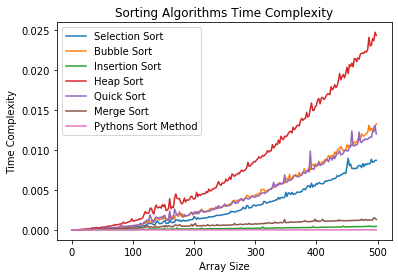

In [14]:
x = Sim(500)
x.fillData()

x.graph()

Note: Although the theoretical time complexity for insertionSort is O(n^2) and heapSort's is O(n*log n), the practical time complexity seems to be the opposite. We can also observe that Python's in-built sort method is superior, so don't attempt to rebuild the wheel when it's not necessary.